In [1]:
import io, os, sys, types

from IPython import get_ipython
from nbformat import read
from IPython.core.interactiveshell import InteractiveShell

def find_notebook(fullname, path=None):
    """find a notebook, given its fully qualified name and an optional path
    
    This turns "foo.bar" into "foo/bar.ipynb"
    and tries turning "Foo_Bar" into "Foo Bar" if Foo_Bar
    does not exist.
    """
    name = fullname.rsplit('.', 1)[-1]
    if not path:
        path = ['']
    for d in path:
        nb_path = os.path.join(d, name + ".ipynb")
        if os.path.isfile(nb_path):
            return nb_path
        # let import Notebook_Name find "Notebook Name.ipynb"
        nb_path = nb_path.replace("_", " ")
        if os.path.isfile(nb_path):
            return nb_path
            
class NotebookLoader(object):
    """Module Loader for Jupyter Notebooks"""
    def __init__(self, path=None):
        self.shell = InteractiveShell.instance()
        self.path = path
    
    def load_module(self, fullname):
        """import a notebook as a module"""
        path = find_notebook(fullname, self.path)
        
        print ("importing Jupyter notebook from %s" % path)
                                       
        # load the notebook object
        with io.open(path, 'r', encoding='utf-8') as f:
            nb = read(f, 4)
        
        
        # create the module and add it to sys.modules
        # if name in sys.modules:
        #    return sys.modules[name]
        mod = types.ModuleType(fullname)
        mod.__file__ = path
        mod.__loader__ = self
        mod.__dict__['get_ipython'] = get_ipython
        sys.modules[fullname] = mod
        
        # extra work to ensure that magics that would affect the user_ns
        # actually affect the notebook module's ns
        save_user_ns = self.shell.user_ns
        self.shell.user_ns = mod.__dict__
        
        try:
          for cell in nb.cells:
            if cell.cell_type == 'code':
                # transform the input to executable Python
                code = self.shell.input_transformer_manager.transform_cell(cell.source)
                # run the code in themodule
                exec(code, mod.__dict__)
        finally:
            self.shell.user_ns = save_user_ns
        return mod

class NotebookFinder(object):
    """Module finder that locates Jupyter Notebooks"""
    def __init__(self):
        self.loaders = {}
    
    def find_module(self, fullname, path=None):
        nb_path = find_notebook(fullname, path)
        if not nb_path:
            return
        
        key = path
        if path:
            # lists aren't hashable
            key = os.path.sep.join(path)
        
        if key not in self.loaders:
            self.loaders[key] = NotebookLoader(path)
        return self.loaders[key]

sys.meta_path.append(NotebookFinder())

# Showcase

In [2]:
import image_augmentation_lib

importing Jupyter notebook from image_augmentation_lib.ipynb


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

3264 4928
Image before resize: (3264, 4928, 3)
Resized image size :  (300, 500, 3)


<Figure size 640x480 with 1 Axes>

before  (3264, 4928, 3)
paded  (3384, 5048, 3)


<Figure size 640x480 with 1 Axes>

Resized image size :  (300, 500, 3)


<Figure size 640x480 with 1 Axes>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Resized image size :  (300, 500, 3)


<Figure size 640x480 with 1 Axes>

picture before:


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

In [3]:
from image_augmentation_lib import center_crop_px, center_crop_percents, crop_px, crop_percents, random_crop_px, random_crop_percents
from image_augmentation_lib import flip_horizontal, flip_vertical
from image_augmentation_lib import resize_image
from image_augmentation_lib import zero_pad

In [5]:
from image_augmentation_lib import kernel_blur, kernel_sharp

In [6]:
from image_augmentation_lib import conv_one_step, convolution_one_layer, full_convolution

In [7]:
from image_augmentation_lib import dropout_random, dropout
from image_augmentation_lib import shuffle

In [58]:
from image_augmentation_lib import opacity, overlay2_images

ImportError: cannot import name 'opacity' from 'image_augmentation_lib' (image_augmentation_lib.ipynb)

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [10]:
def namestr(obj: str, namespace) -> str:
    """
    Takes an object and returns variable names.
    Eg. Can be used to get variable names from the list with np.arrays

    Keyword Arguments:
        obj {str} -- name of the variable for assigned object
        namespace {obj} -- namespace of object (eg. globals())
    
    Returns:
        str -- name of the variable 
    """
    return [name for name in namespace if namespace[name] is obj][0]

# for i in pics:
#     print(namestr(i, globals()))

In [11]:
def plot_images(pictures: list, columns: int, rows: int, fig_size: tuple) -> None:
    """
    Plots images in specified grid for provided image list
    
    Keyword Arguments:
        pictires {list} -- list of images as np.arrays
        columns {int} -- columns to plot
        rows {int} -- rows to plot
        fig_size -- tuple of image size

    Returns:
        None -- plots an images
    """
    fig=plt.figure(figsize=fig_size)
    for i in range(1, columns * rows +1):
        image = pictures[i-1]
        img_name = namestr(image, globals())
        fig.add_subplot(rows, columns, i, title=img_name)
        plt.imshow(image)
    plt.show()

# Image data

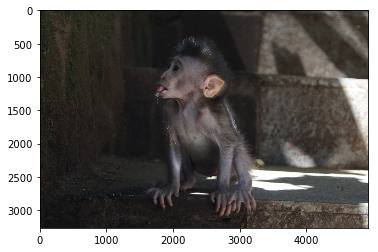

In [12]:
monkey = '../pics/DSC_3837.jpg'
cat = '../pics/cat.jpg'
bird = '../pics/bird.jpg'
sun = '../pics/Solar.jpg'
img = Image.open(monkey)
img_arr = np.asarray(img)
plt.imshow(img_arr)
plt.show()

In [13]:
img_arr.shape

(3264, 4928, 3)

# CROPS

In [14]:
center_cropped_px = center_crop_px(monkey, (1800, 1600))
center_cropped_percents = center_crop_percents(monkey, (0.6))
cropped_px = crop_px(monkey, 100, 900, (2000))
cropped_percents = crop_percents(monkey, (500, 1000), (.7, .5))
random_cropped_px = random_crop_px(monkey, (1000))
random_cropped_percents = random_crop_percents(monkey, (.4, .6))

In [15]:
pics = [center_cropped_px, center_cropped_percents, cropped_px, cropped_percents, random_cropped_px, random_cropped_percents]

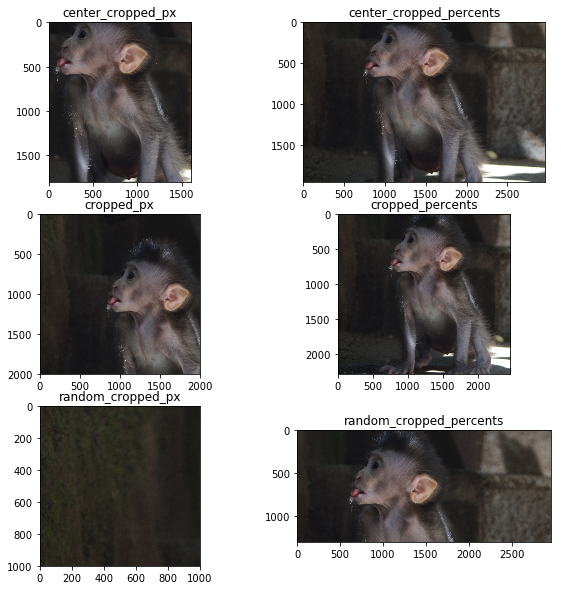

In [16]:
plot_images(pics, 2, 3, (10, 10))

# Flips

In [17]:
before_flipping = img_arr
horizontally_flipped = flip_horizontal(monkey)
vertically_fliped = flip_vertical(monkey)
flipped = [before_flipping, horizontally_flipped, vertically_fliped]

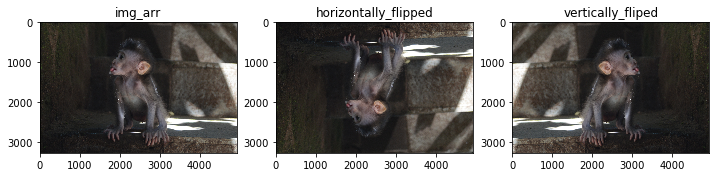

In [18]:
plot_images(flipped, 3, 1, (12, 12))

# Convolution

Image before resize: (3264, 4928, 3)
Resized image size: (300, 500, 3)


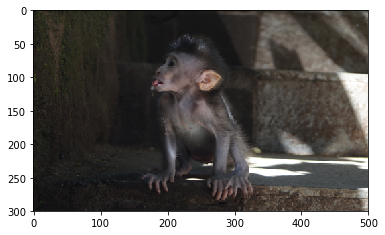

In [19]:
resized_arr = resize_image(monkey, (500, 300)) 
print(f"Resized image size: {resized_arr.shape}")
plt.imshow(resized_arr)
plt.show()

In [21]:
# before_convolution_1_layer = resized_arr[:,:,1]
# one_layer_blur = convolution_one_layer(resized_arr, 1, kernel_blur)
# one_layer_sharp = convolution_one_layer(resized_arr, 1, kernel_sharp)
before_full_convolution = resized_arr
full_convolution_blur = full_convolution(resized_arr, kernel_blur)
full_convolution_sharp = full_convolution(resized_arr, kernel_sharp)

# conv = [before_convolution_1_layer, one_layer_blur, one_layer_sharp, before_full_convolution, full_convolution_blur, full_convolution_sharp]
conv = [before_full_convolution, full_convolution_blur, full_convolution_sharp]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


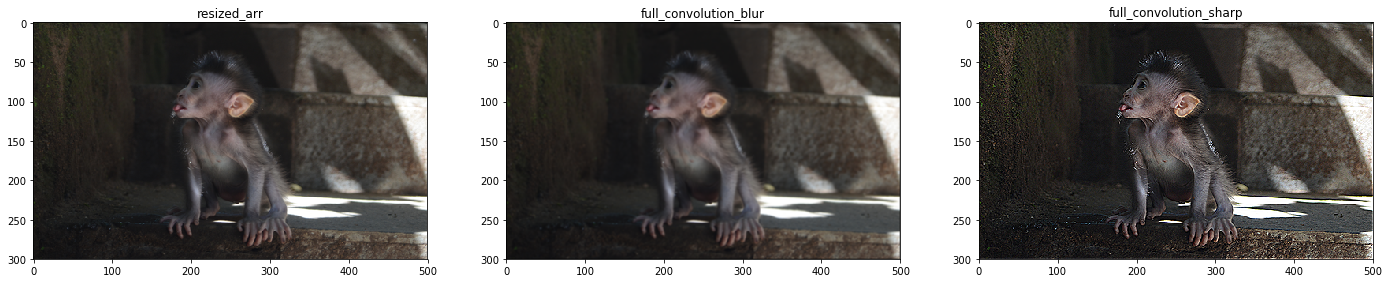

In [22]:
plot_images(conv, 3, 1, (24, 24))

# Dropout

In [23]:
img_array = img_arr.copy()
random_dropped = dropout_random(img_array)
dropped_by_intensity = dropout(img_array, 0.10)

drp = [random_dropped, dropped_by_intensity]


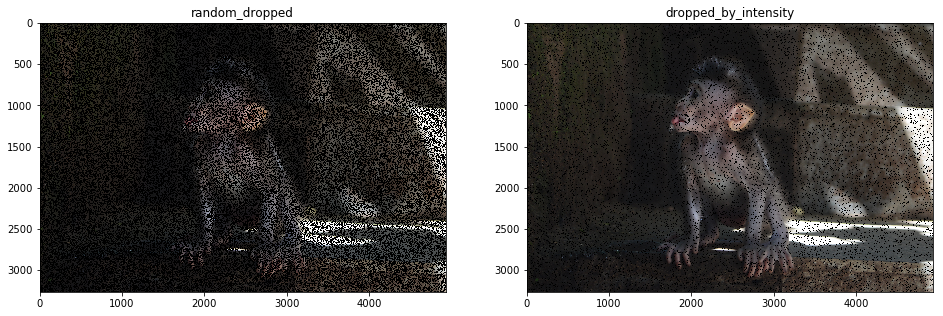

In [52]:
plot_images(drp, 2, 1, (16, 16))

# Shuffle channels

In [25]:
resized_arr = resize_image(monkey, (500, 300)) 
before_shuffle = resized_arr
shuffled = shuffle(resized_arr, 'BRG')
shfl = [before_shuffle, shuffled]

Image before resize: (3264, 4928, 3)


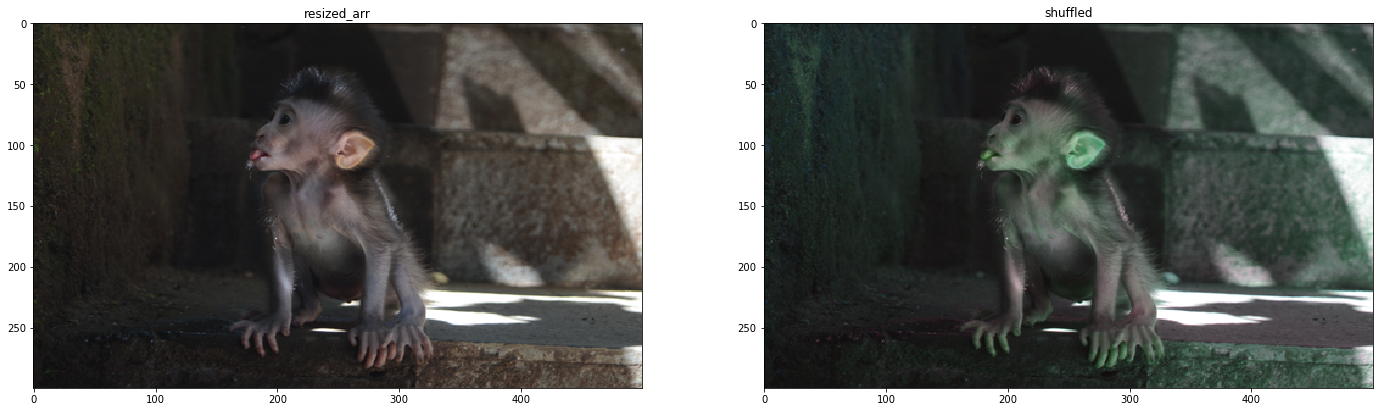

In [26]:
plot_images(shfl, 2, 1, (24, 24))

# Multiple methods via chaining or pipelines

In [34]:
resized_arr = resize_image(monkey, (500, 300)) 
resized_arr.shape

Image before resize: (3264, 4928, 3)


(300, 500, 3)

In [56]:
cr = crop_percents(resized_arr, (50, 150), (.5))
rc = random_crop_percents(resized_arr, (.6))

cropped_dropped_suffled = shuffle(dropout(cr, 0.20), 'BRG')
cropped_flipped = flip_vertical(rc)
cropped_flipped_dropped = dropout(cropped_flipped, 0.20)
cropped_flipped_sharp = flip_horizontal(full_convolution(cr, kernel_sharp))

mixed = [cropped_dropped_suffled, cropped_flipped, cropped_flipped_dropped, cropped_flipped_sharp]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


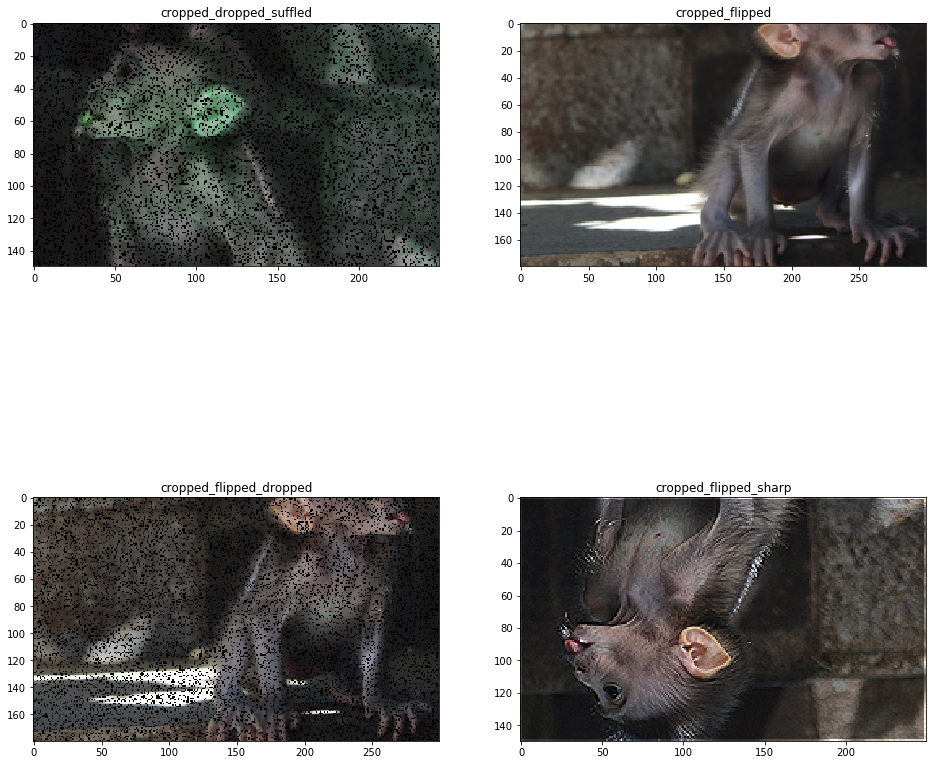

In [57]:
plot_images(mixed, 2, 2, (16, 16))

# Fun

In [ ]:
transparent = opacity(res_arr, 0.7)
